In [1]:
import sys
!{sys.executable} -m pip install matplotlib

In [2]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
worldbankyouthfemaleun = pd.read_csv('./' + 'data_world_bank.csv')

In [4]:
worldbankyouthfemaleun.head(5) 

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,"Unemployment, youth female (% of female labor ...",SL.UEM.1524.FE.ZS,Afghanistan,AFG,NaN,22.96,22.74,22.65,22.39,22.05,21.86,21.65,21.30,21.05,20.90,NaN
1,"Unemployment, youth female (% of female labor ...",SL.UEM.1524.FE.ZS,Albania,ALB,NaN,24.71,19.47,22.84,26.78,32.47,40.37,33.76,26.98,25.74,25.85,NaN
2,"Unemployment, youth female (% of female labor ...",SL.UEM.1524.FE.ZS,Algeria,DZA,NaN,47.99,35.14,39.08,39.86,39.14,45.11,43.51,45.68,45.52,45.55,NaN
3,"Unemployment, youth female (% of female labor ...",SL.UEM.1524.FE.ZS,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Unemployment, youth female (% of female labor ...",SL.UEM.1524.FE.ZS,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#clean the data, drop useless columns
youthfemaleun_2015_2019 = worldbankyouthfemaleun.drop(columns=['Series Name', 'Series Code', '1990 [YR1990]', '2000 [YR2000]', '2011 [YR2011]', '2012 [YR2012]',
       '2013 [YR2013]', '2014 [YR2014]', '2020 [YR2020]'])

In [6]:
#rename columns
youthfemaleun_2015_2019.rename(columns={'2015 [YR2015]': '2015', '2016 [YR2016]': '2016', '2017 [YR2017]': '2017', '2018 [YR2018]': '2018', '2019 [YR2019]': '2019'}, inplace=True)

In [7]:
#check if there are null 
youthfemaleun_2015_2019.isnull().any()

Country Name    True
Country Code    True
2015            True
2016            True
2017            True
2018            True
2019            True
dtype: bool

In [8]:
#sum null
pd.isnull(youthfemaleun_2015_2019).sum()

Country Name     5
Country Code     5
2015            36
2016            36
2017            36
2018            36
2019            36
dtype: int64

In [9]:
#clean null
cleanyouthfemaleun_2015_2019 = youthfemaleun_2015_2019.dropna(how='any', axis='rows')

In [10]:
#check if clean well
pd.isnull(cleanyouthfemaleun_2015_2019).sum()

Country Name    0
Country Code    0
2015            0
2016            0
2017            0
2018            0
2019            0
dtype: int64

In [11]:
#check index
cleanyouthfemaleun_2015_2019.index

Int64Index([  0,   1,   2,   5,   7,   8,  10,  11,  12,  13,
            ...
            256, 257, 258, 259, 260, 261, 262, 263, 264, 265],
           dtype='int64', length=235)

In [12]:
#reset index
data = cleanyouthfemaleun_2015_2019.reset_index(drop=True)

In [13]:
data.head()

,Country Name,Country Code,2015,2016,2017,2018,2019
0,Afghanistan,AFG,21.86,21.65,21.30,21.05,20.90
1,Albania,ALB,40.37,33.76,26.98,25.74,25.85
2,Algeria,DZA,45.11,43.51,45.68,45.52,45.55
3,Angola,AGO,16.62,16.36,16.21,16.00,15.92
4,Argentina,ARG,23.70,25.76,27.25,28.23,28.83


In [14]:
data.tail()

,Country Name,Country Code,2015,2016,2017,2018,2019
230,Sub-Saharan Africa,SSF,12.337161,13.344745,13.269268,13.108375,13.052483
231,Sub-Saharan Africa (excluding high income),SSA,12.337161,13.344745,13.269268,13.108375,13.052483
232,Sub-Saharan Africa (IDA & IBRD countries),TSS,12.337161,13.344745,13.269268,13.108375,13.052483
233,Upper middle income,UMC,15.476532,16.413761,17.126538,17.004519,17.697722
234,World,WLD,16.727766,17.027326,17.083363,17.139938,17.124331


In [15]:
#following steps to know the structure of data
data.size

1645

In [16]:
data.shape 

(235, 7)

In [17]:
data.columns

Index(['Country Name', 'Country Code', '2015', '2016', '2017', '2018', '2019'], dtype='object')

In [18]:
data.dtypes

Country Name     object
Country Code     object
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
dtype: object

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  235 non-null    object 
 1   Country Code  235 non-null    object 
 2   2015          235 non-null    float64
 3   2016          235 non-null    float64
 4   2017          235 non-null    float64
 5   2018          235 non-null    float64
 6   2019          235 non-null    float64
dtypes: float64(5), object(2)
memory usage: 13.0+ KB


In [20]:
data.describe() 

,2015,2016,2017,2018,2019
count,235.000000,235.000000,235.000000,235.000000,235.000000
mean,19.602949,19.505669,19.208427,18.821508,18.592873
std,13.760208,13.578398,13.667330,13.821361,13.631147
min,0.410000,0.380000,0.370000,0.360000,0.350000
25%,9.988760,9.761673,9.155000,8.745000,8.795000
50%,16.436311,16.200000,15.370000,15.360000,15.410000
75%,24.799982,26.210000,25.275000,24.520000,24.611211
max,69.470000,69.520000,69.510000,69.370000,68.390000


In [21]:
data.describe(include='all')

,Country Name,Country Code,2015,2016,2017,2018,2019
count,235,235,235.000000,235.000000,235.000000,235.000000,235.000000
unique,235,235,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,19.602949,19.505669,19.208427,18.821508,18.592873
std,NaN,NaN,13.760208,13.578398,13.667330,13.821361,13.631147
min,NaN,NaN,0.410000,0.380000,0.370000,0.360000,0.350000
25%,NaN,NaN,9.988760,9.761673,9.155000,8.745000,8.795000
50%,NaN,NaN,16.436311,16.200000,15.370000,15.360000,15.410000
75%,NaN,NaN,24.799982,26.210000,25.275000,24.520000,24.611211


In [22]:
len(data["Country Name"])

235

In [23]:
#check if all objects of "Country Name" is unique
len(data["Country Name"].unique())

235

In [24]:
#check all the length of columns
len(data["Country Code"])

235

In [25]:
len(data["2015"])

235

In [26]:
len(data["2016"])

235

In [27]:
len(data["2017"])

235

In [28]:
len(data["2018"])

235

In [29]:
len(data["2019"])

235

In [30]:
years =['2015', '2016', '2017', '2018', '2019']

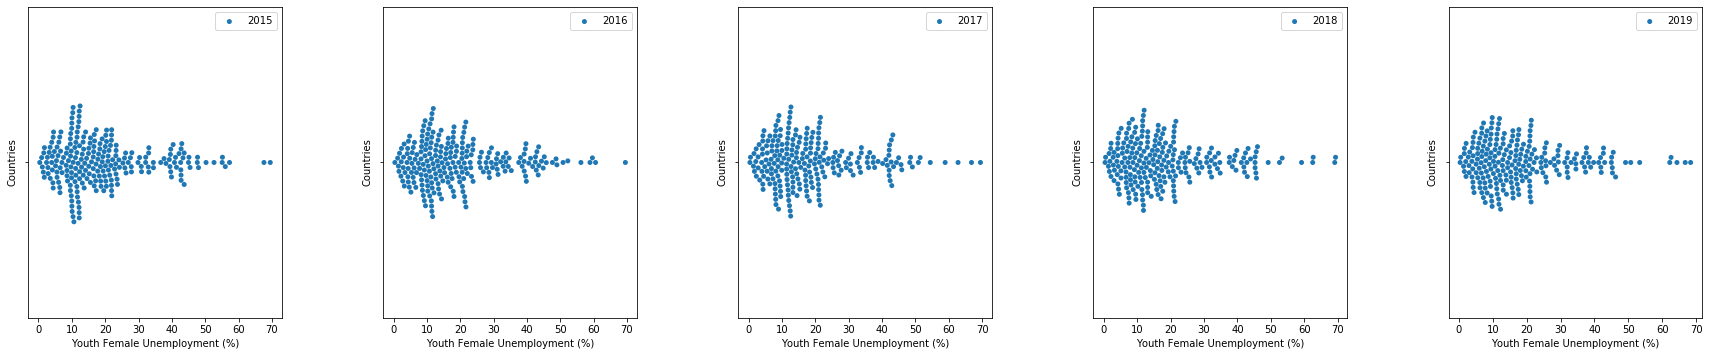

In [31]:
#create the swarmplot to know the trend in the different years
fig = plt.figure(figsize=(30,40)) 
fig.subplots_adjust(hspace=0.5, wspace = 0.4)#spaces between plots
n = 1
for column in years:
    ax = fig.add_subplot(len(years),5,n) 
    info = data[column]
    sns.swarmplot(info)
    plt.xlabel('Youth Female Unemployment (%)')
    plt.ylabel('Countries')
    ax.legend([column],loc = 'upper right') #title of the single plot
    n = n+1

plt.show()
#fig.savefig('worldtrend.png')

In [32]:
#set the new column to see the change from 2015 to 2019
data['2015-2019 change']=data['2019']-data['2015']

[Text(0.5, 0, '% change in Youth Female Unemployment Rates'),
 Text(0.5, 1.0, 'Net % change in Youth Female Unemployment Rates between 2015-2019')]

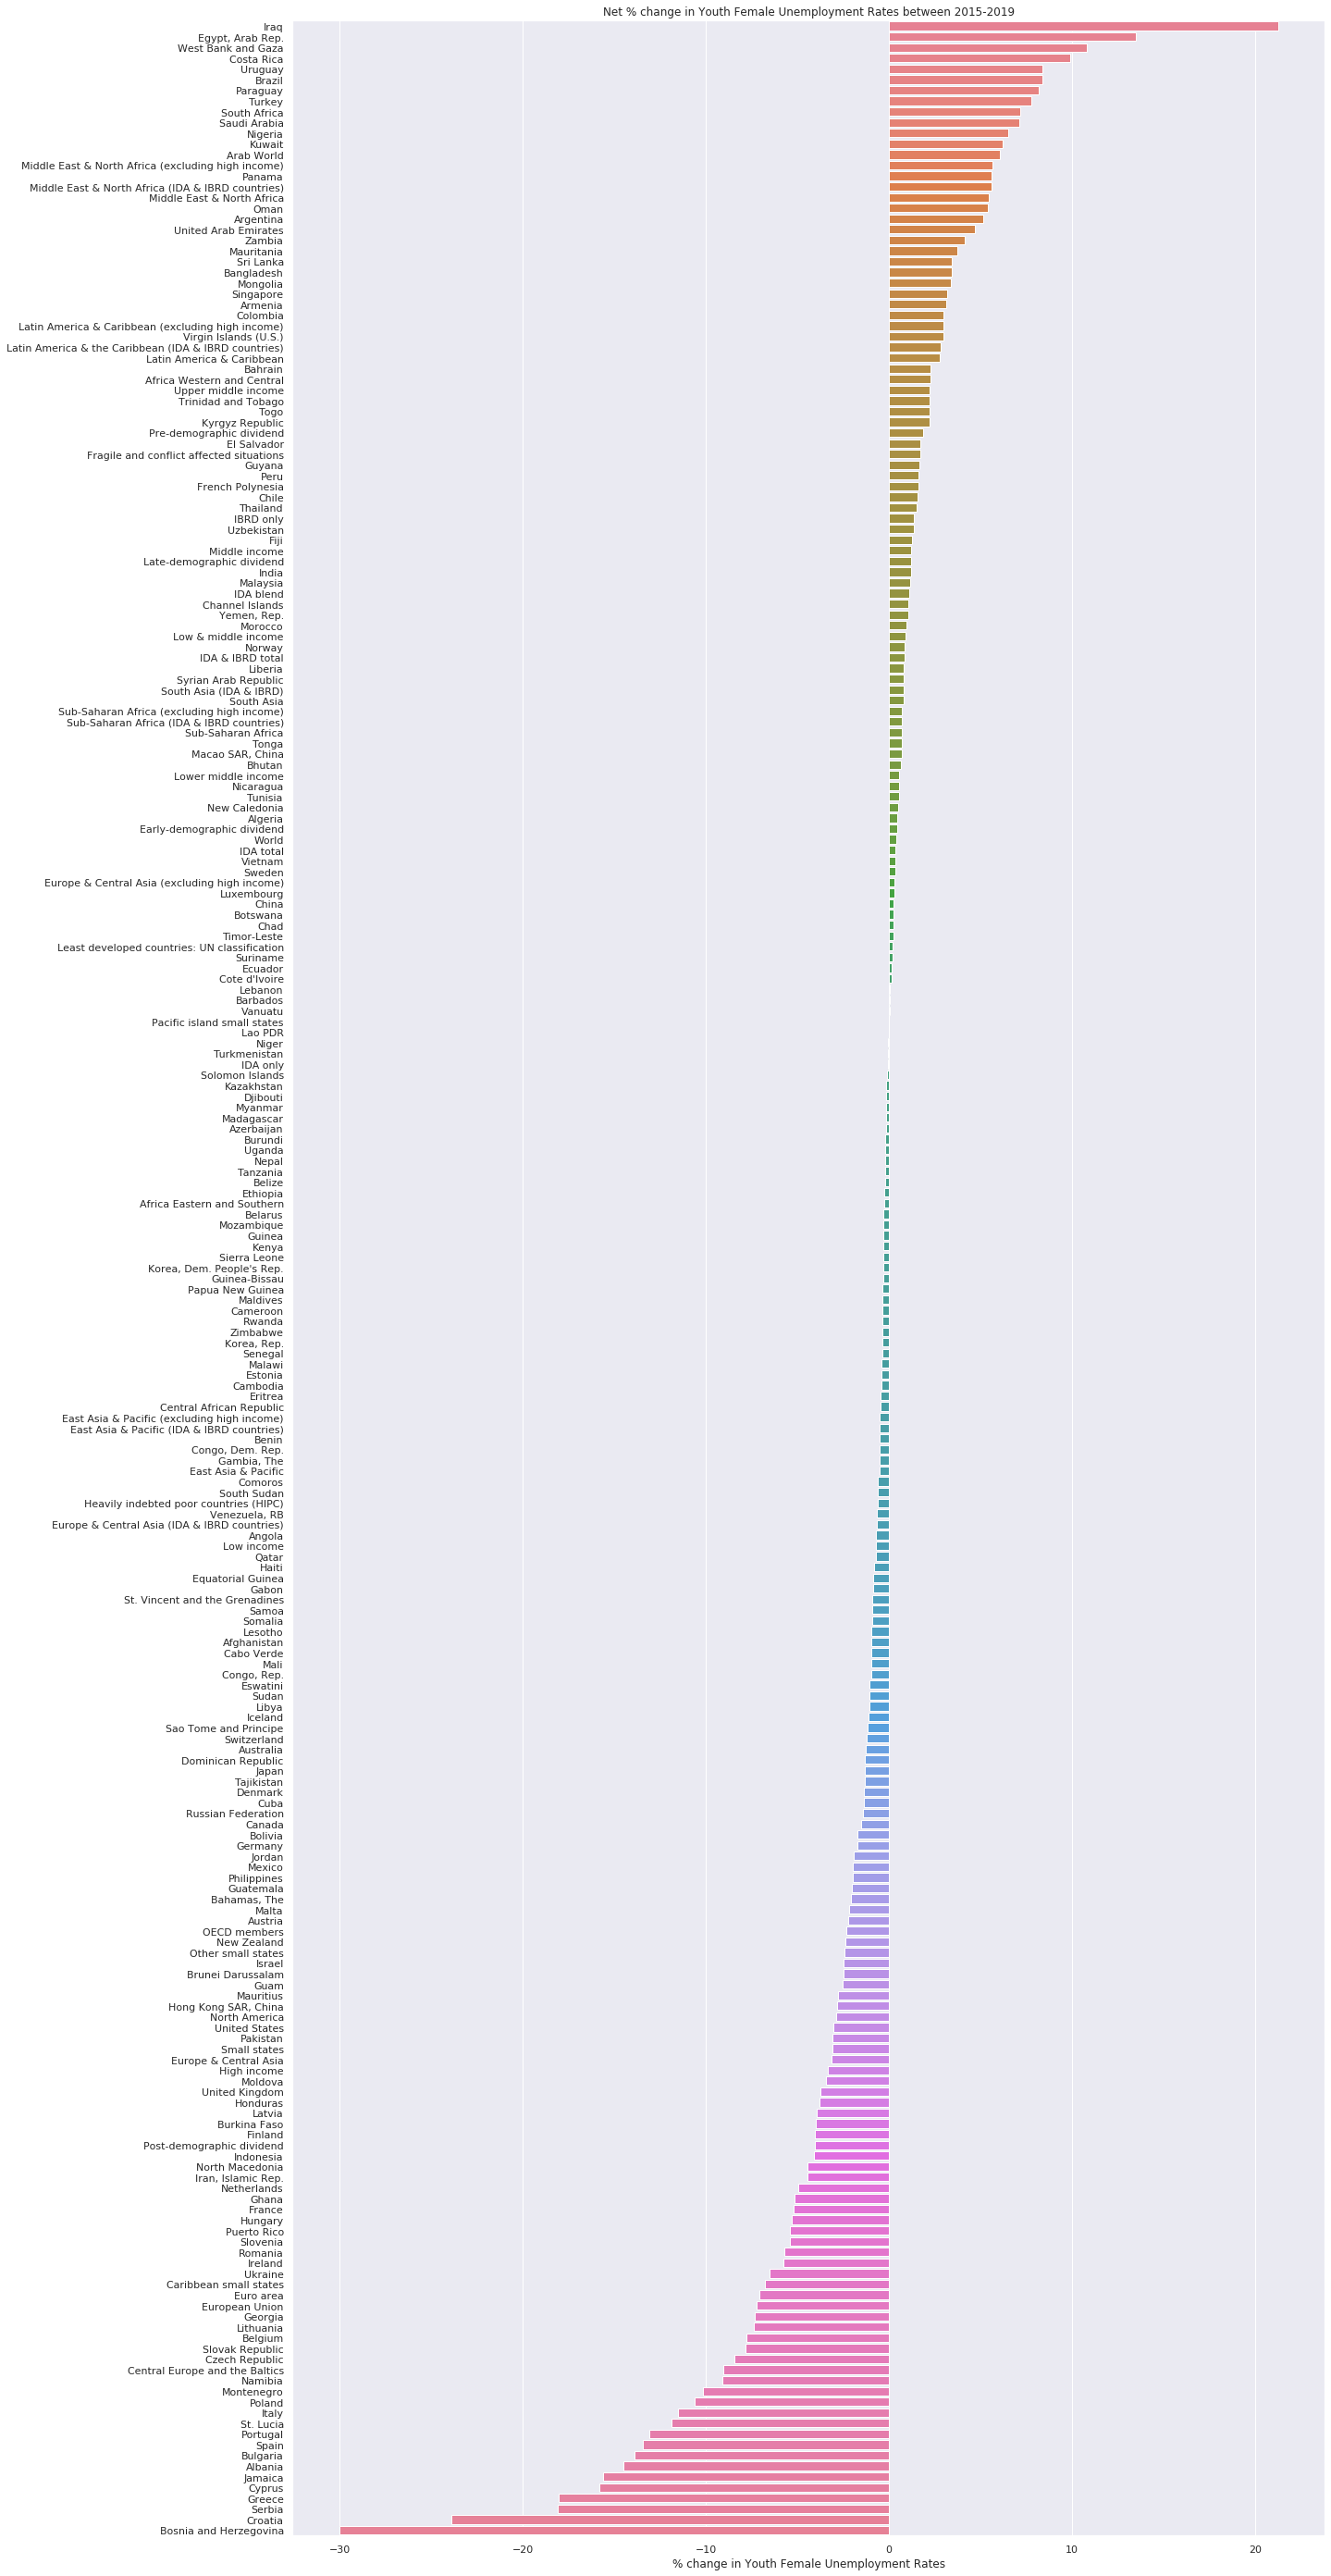

In [33]:
#create the bar plot to see the changes of all the countries
change_bar, countries_bar = (list(x) for x in zip(*sorted(zip(data['2015-2019 change'], data['Country Name']), 
                                                             reverse = True)))
sns.set(font_scale=1) 
fig, axes = plt.subplots(1,1, figsize=(20, 50))
#set the color 
color = sns.color_palette('husl', len(data['2015']))
sns.barplot(change_bar, countries_bar, palette = color,ax=axes)
axes.set(xlabel='% change in Youth Female Unemployment Rates', title='Net % change in Youth Female Unemployment Rates between 2015-2019')
#fig.savefig('changes.png')

In [34]:
#reorder the data by 2015-2019 change ascending=True
top = data.sort_values(by='2015-2019 change',ascending=True)
top10 = top.head(10)

In [35]:
##reorder the data by 2015-2019 change, ascending=False
bottom = data.sort_values(by='2015-2019 change',ascending=False)
bottom10 = bottom.head(10)

[Text(0.5, 0, '% change in Youth Female Unemployment Rates'),
 Text(0.5, 1.0, 'Bottom 10 Performers in Improving Youth Female Unemployment between 2015-19')]

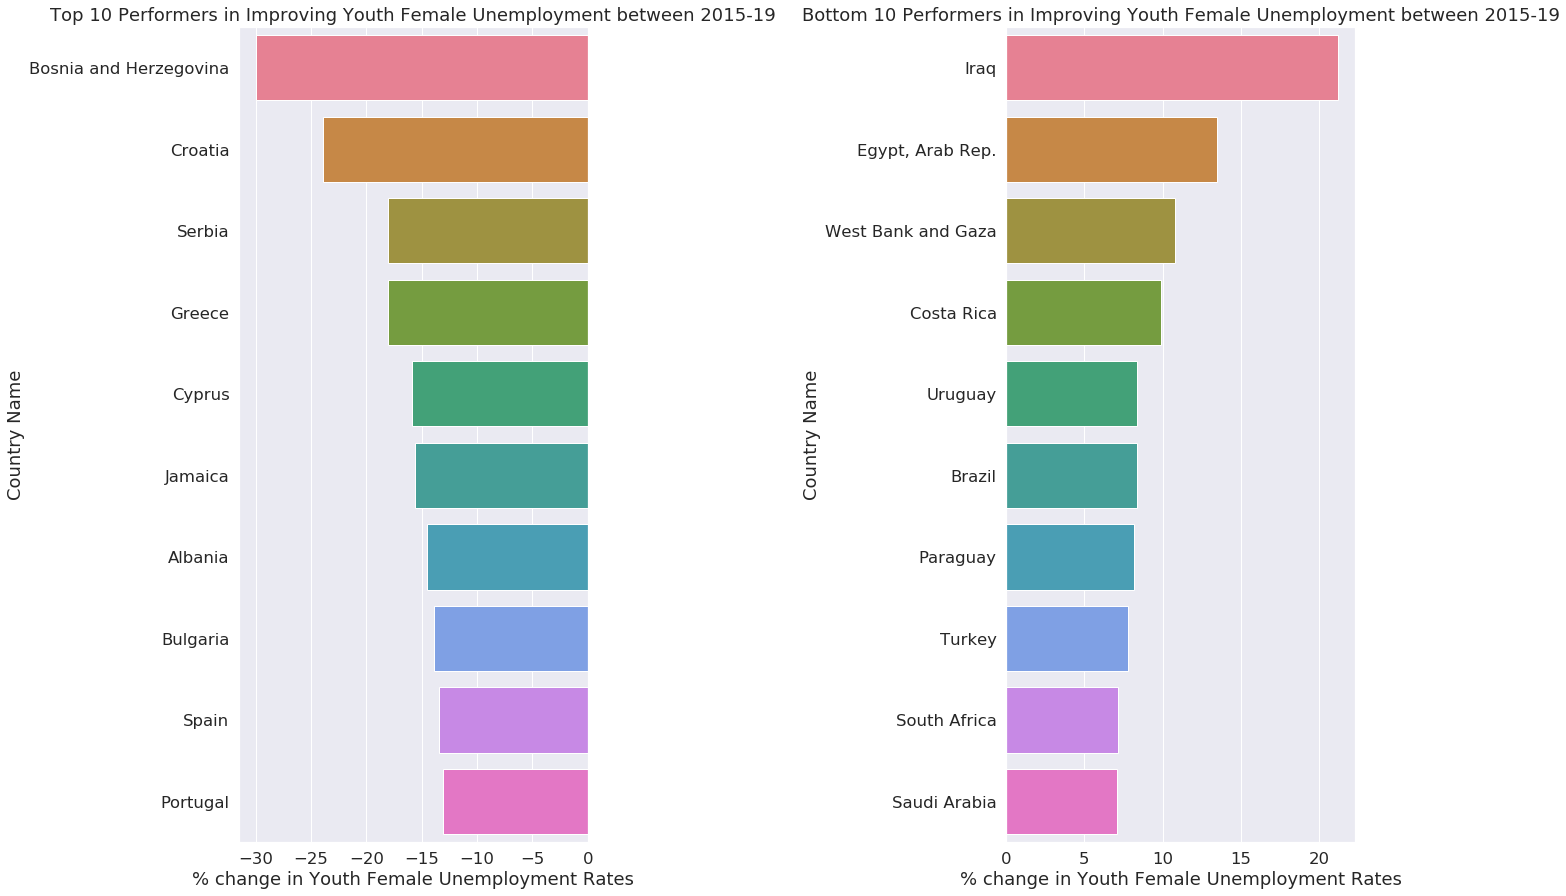

In [36]:
#create the bar plots about top 10 and bottom 10 countries
sns.set(font_scale=1.5) 
fig, axes = plt.subplots(1,2,figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace = 1.2) 
colorspal = sns.color_palette('husl', len(top10['2015']))
sns.barplot(top10['2015-2019 change'], top10['Country Name'], palette = colorspal,ax=axes[0])
sns.barplot(bottom10['2015-2019 change'], bottom10['Country Name'], palette = colorspal,ax=axes[1])
axes[0].set(xlabel='% change in Youth Female Unemployment Rates', title='Top 10 Performers in Improving Youth Female Unemployment between 2015-19')
axes[1].set(xlabel='% change in Youth Female Unemployment Rates', title='Bottom 10 Performers in Improving Youth Female Unemployment between 2015-19')
#fig.savefig('top_bottom.png')

In [37]:
#combine two dataframes to one df
topandbottom = [top10, bottom10]
top_bottom = pd.concat(topandbottom)
top_bottom

,Country Name,Country Code,2015,2016,2017,2018,2019,2015-2019 change
19,Bosnia and Herzegovina,BIH,67.58,58.91,51.42,45.70,37.56,-30.02
41,Croatia,HRV,43.68,31.34,27.74,29.38,19.75,-23.93
144,Serbia,SRB,47.68,39.13,35.95,31.76,29.60,-18.08
65,Greece,GRC,55.14,50.83,48.30,43.92,37.09,-18.05
43,Cyprus,CYP,29.84,30.86,22.24,15.69,13.99,-15.85
83,Jamaica,JAM,42.62,39.59,35.64,30.82,26.99,-15.63
1,Albania,ALB,40.37,33.76,26.98,25.74,25.85,-14.52
23,Bulgaria,BGR,22.25,16.90,12.44,11.87,8.32,-13.93
153,Spain,ESP,47.96,44.88,37.41,33.27,34.53,-13.43
134,Portugal,PRT,34.44,28.73,25.46,20.81,21.36,-13.08


In [38]:
#clean data columns and reindex
top_bottom=top_bottom[['Country Name','2015','2016','2017','2018','2019']]
top_bottom=top_bottom.set_index('Country Name')
top_bottom

,2015,2016,2017,2018,2019
Country Name,,,,,
Bosnia and Herzegovina,67.58,58.91,51.42,45.70,37.56
Croatia,43.68,31.34,27.74,29.38,19.75
Serbia,47.68,39.13,35.95,31.76,29.60
Greece,55.14,50.83,48.30,43.92,37.09
Cyprus,29.84,30.86,22.24,15.69,13.99
Jamaica,42.62,39.59,35.64,30.82,26.99
Albania,40.37,33.76,26.98,25.74,25.85
Bulgaria,22.25,16.90,12.44,11.87,8.32
Spain,47.96,44.88,37.41,33.27,34.53


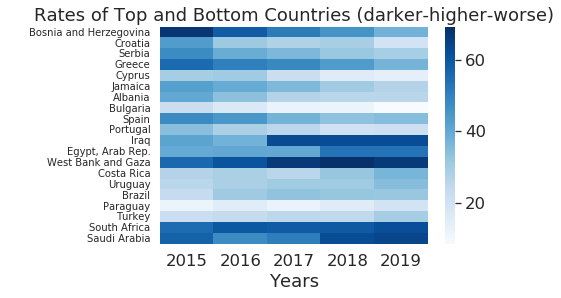

In [39]:
#check the real rate of the top and bottom rates, because although some rates change a lot, it can not prove the real situation in the country is well
#
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(top_bottom, cmap='Blues', yticklabels=top_bottom.index)
plt.yticks(size=10)
plt.xlabel('Years')
plt.ylabel(' ')
plt.title('Rates of Top and Bottom Countries (darker-higher-worse)')
plt.show()
#fig.savefig('rate of top_bottom.png')

In [40]:
#the name of the supranational organizations
supranational_groups=['Arab World','Caribbean small states','East Asia & Pacific','European Union','Latin America & Caribbean', 'Middle East & North Africa','North America','OECD members','Other small states','South Asia',
                      'Sub-Saharan Africa','World']

In [41]:
#create new dataframe of supranational organizations
df_supranational=data[data['Country Name'].isin(supranational_groups)]

In [42]:
df_supranational=df_supranational[['Country Name','2015','2016','2017','2018','2019']]
df_supranational.head()

,Country Name,2015,2016,2017,2018,2019
189,Arab World,39.225762,38.569431,41.572378,45.293983,45.262256
190,Caribbean small states,32.149672,31.232152,29.284566,27.081757,25.367703
193,East Asia & Pacific,9.849605,9.603371,9.418662,9.279722,9.312437
200,European Union,24.124342,22.360818,19.974800,18.000445,16.906705
210,Latin America & Caribbean,18.260580,20.613334,20.932305,20.799781,21.016637


In [43]:
#reindex with 'Country Name'
df_supranational=df_supranational.set_index('Country Name')

In [44]:
df_supranational=(df_supranational.T).copy()
df_supranational.head()

Country Name,Arab World,Caribbean small states,East Asia & Pacific,European Union,Latin America & Caribbean,Middle East & North Africa,North America,OECD members,Other small states,South Asia,Sub-Saharan Africa,World
2015,39.225762,32.149672,9.849605,24.124342,18.260580,39.640116,10.378023,15.252873,27.992276,20.188718,12.337161,16.727766
2016,38.569431,31.232152,9.603371,22.360818,20.613334,39.188129,9.420324,14.372723,28.254342,20.574783,13.344745,17.027326
2017,41.572378,29.284566,9.418662,19.974800,20.932305,42.042625,8.175357,13.476752,27.034379,20.777618,13.269268,17.083363
2018,45.293983,27.081757,9.279722,18.000445,20.799781,45.278346,7.767451,12.739157,25.723936,20.879339,13.108375,17.139938
2019,45.262256,25.367703,9.312437,16.906705,21.016637,45.074130,7.482564,12.938791,25.579602,20.965974,13.052483,17.124331


Text(0.5, 1.0, 'Youth Female Unemployment among Supranational Groups')

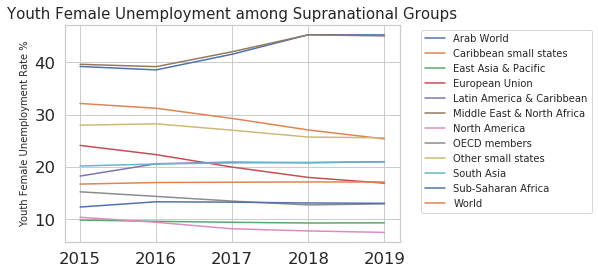

In [45]:
#create multiple linears plot to see the trends of different supranational organizations
sns.set_style("whitegrid")
sns.set_color_codes('pastel')
ax = plt.subplot(111)
for n in range(len(supranational_groups)):
    plt.plot(years, df_supranational[supranational_groups[n]], label = supranational_groups[n])
    ax.set_ylabel('Youth Female Unemployment Rate %', fontsize=10)
#names of the linears
plt.legend(loc='upper left',frameon=True,bbox_to_anchor=(1.05,1), fontsize=10)
plt.title('Youth Female Unemployment among Supranational Groups', fontsize=15)
#fig.savefig('Supranational Groups.png')

In [46]:
#name of income groups
income_groups=['High income','Heavily indebted poor countries (HIPC)','Least developed countries: UN classification', 'Low income','Lower middle income', 'Low & middle income','Middle income', 
               'Upper middle income','World']

In [47]:
#create new dataframe of income groups
df_income=data[data['Country Name'].isin(income_groups)]

In [48]:
df_income=df_income[['Country Name','2015','2016','2017','2018','2019']]

In [49]:
df_income=df_income.set_index('Country Name')

In [50]:
df_income=(df_income.T).copy()
df_income

Country Name,Heavily indebted poor countries (HIPC),High income,Least developed countries: UN classification,Low & middle income,Low income,Lower middle income,Middle income,Upper middle income,World
2015,10.423940,16.436311,10.970934,16.742966,12.220288,18.466755,17.332943,15.476532,16.727766
2016,10.218069,15.111166,11.171056,17.271912,12.074174,18.898610,17.971777,16.413761,17.027326
2017,9.989357,14.041023,11.527070,17.480973,11.840824,18.925158,18.262921,17.126538,17.083363
2018,9.878514,13.502723,11.279889,17.612724,11.620285,19.304430,18.466568,17.004519,17.139938
2019,9.795536,13.076127,11.168400,17.646621,11.512564,19.021583,18.544071,17.697722,17.124331


Text(0.5, 1.0, 'Youth Female Unemployment among Income Groups')

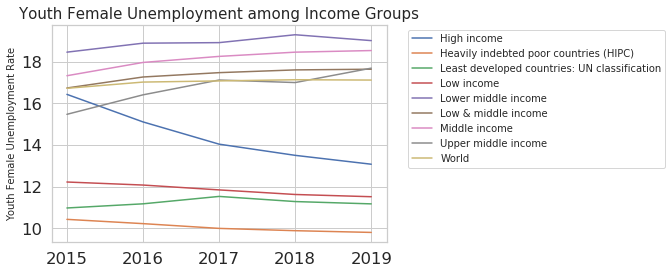

In [51]:
#create multiple linears plot to see the trends of different income groups
sns.set_style("whitegrid")
sns.set_color_codes('pastel')
ax = plt.subplot(111)
for n in range(len(income_groups)):
    plt.plot(years, df_income[income_groups[n]], label = income_groups[n])
    ax.set_ylabel('Youth Female Unemployment Rate', fontsize=10)
plt.legend(loc='upper left',frameon=True,bbox_to_anchor=(1.05,1), fontsize=10)
plt.title('Youth Female Unemployment among Income Groups', fontsize=15)
#fig.savefig('Income Groups.png')